# Suggesting from Combined data
-----
- Date : 31st May 2019
- using R3.5 kernal
- on 89
-----
- Aim : 
1. subset out the known cancer predisposition gene == suggesting
   - known	290
   - suggesting	2726
2. Check how many samples these variants belong to
   - 2726 variants coming from 1273 Tumor_Sample_Barcode
   - these 2726 variants coming from 1175 Hugo_Symbol
   
- Rerun on 17th

In [1]:
source("~/bin/da.R")

In [2]:
suppressPackageStartupMessages({
    library(tidyverse) 
    library(vcd)
    library(readr)
    library(maftools)
    library(corrplot)
    library(knitr)
    library(wordcloud)
    library(RColorBrewer)})

In [3]:
packageVersion("maftools")

[1] ‘1.8.0’

## Check Mutation Data

In [4]:
file_name="../KCPG_Variants/data/Mutation_data_cleaned_051019.xls"

In [5]:
df = readxl::read_excel(file_name)

In [6]:
df %>% dim

[1] 3016   84

In [7]:
df$Mode_of_Inheritance_abb %>% table

.
   AD    AR AR/AD   XLD 
  153    92    43     2 

In [8]:
knitr::kable( sort( table(df$Tumor_types ),decreasing = T), format="pandoc")



Var1     Freq
------  -----
CNS       613
WLM       405
NBL       343
RHB       259
OS        241
HGG       229
RB        221
EWS       192
STS       177
GCT       139
ACT        79
LGG        52
CA         35
OST        18
RCC         5
GICT        2
LMPRT       2
PGL         2
BCC         1
NM          1

In [9]:
cbind( df$Known_Cancer_Predisposition_Genes %>% table )

known,290
suggesting,2726


In [10]:
df = df[df$Known_Cancer_Predisposition_Genes == 'suggesting',]
df = droplevels(df)

In [11]:
df%>% dim

[1] 2726   84

In [12]:
len( unique(df$Tumor_Sample_Barcode) )

[1] 1273

In [13]:
len( unique(df$Hugo_Symbol) )

[1] 1175

## Check Clinical Data 

In [14]:
file_name_clinical = "../KCPG_Variants/data/Combined_Clinical_Data_03.xlsx"

In [15]:
df2 = readxl::read_excel( file_name_clinical )

In [16]:
df2 %>% head

Tumor_Sample_Barcode,Tumor_type,Tumor_type2,Age_of_Onset,Sex,Age_group,sample_type,sequencing_type,Access_unit,Status,Ethnicity,Race
SJACT014,Adrenocortical Carcinoma,ACT,0.9138889,Female,Children,germline,WES,PCGP,live,NA,NA
SJACT019118,Adrenocortical Carcinoma,ACT,1.0200000,Female,Children,germline,WES,SJLIFE,live,"Non Spanish speaking, Non Hispanic",NA
SJACT025,Adrenocortical Carcinoma,ACT,1.0833333,Female,Children,germline,WES,PCGP,live,NA,NA
SJACT018,Adrenocortical Carcinoma,ACT,1.0833333,Female,Children,germline,WES,PCGP,live,NA,NA
SJACT010,Adrenocortical Carcinoma,ACT,1.1138889,Male,Children,germline,WES,PCGP,live,NA,NA
SJACT016,Adrenocortical Carcinoma,ACT,1.2611111,Male,Children,germline,WES,PCGP,live,NA,NA


In [17]:
df2 %>% dim

[1] 1507   12

In [18]:
len( intersect( unique(df$Tumor_Sample_Barcode), unique(df2$Tumor_Sample_Barcode) ) )

[1] 1273

In [19]:
setdiff( df$Tumor_Sample_Barcode, df2$Tumor_Sample_Barcode )

character(0)

In [20]:
table( df$Tumor_Sample_Barcode %in% intersect( df$Tumor_Sample_Barcode, df2$Tumor_Sample_Barcode )) 


TRUE 
2726 

In [21]:
ss = df$Tumor_Sample_Barcode %in% intersect( df$Tumor_Sample_Barcode, df2$Tumor_Sample_Barcode )

In [22]:
df_ss = df[ ss, ]

In [23]:
df_ss %>% dim

[1] 2726   84

In [24]:
table(df_ss$Tumor_types, useNA = "always")


  ACT   BCC    CA   CNS   EWS   GCT  GICT   HGG   LGG LMPRT   NBL    NM    OS 
   68     1    35   547   181   129     2   217    48     2   307     1   222 
  OST   PGL    RB   RCC   RHB   STS   WLM  <NA> 
   16     2   170     5   238   163   372     0 

In [25]:
table(df_ss$Known_Cancer_Predisposition_Genes, useNA = "always")


suggesting       <NA> 
      2726          0 

In [26]:
cbind(dim(df_ss), dim(df2))

2726,1507
84,12


In [32]:
df_ss %>% dim

[1] 2726   84

In [33]:
df2 %>% dim

[1] 1507   12

In [34]:
ss2 = df2$Tumor_Sample_Barcode %in% intersect( df2$Tumor_Sample_Barcode, df$Tumor_Sample_Barcode) 

In [35]:
df2_ss=df2[ss2,]

In [36]:
df2_ss %>% dim

[1] 1273   12

## Note : 
- using only suggesting to make MAF tools

## Creating a MAF object

In [37]:
dfx = read.maf(maf=df_ss,clinicalData = df2_ss , isTCGA = FALSE, verbose = TRUE, removeDuplicatedVariants = FALSE, useAll = TRUE )

silent variants: 5


        ID N
1: Samples 5
2: 5'Flank 5


Summarizing..
NOTE: Mutiple reference builds found!
37;38


                   ID summary  Mean Median
 1:        NCBI_Build   37;38    NA     NA
 2:            Center    <NA>    NA     NA
 3:           Samples    1273    NA     NA
 4:            nGenes    1173    NA     NA
 5:   Frame_Shift_Del     197 0.155      0
 6:   Frame_Shift_Ins     180 0.142      0
 7:      In_Frame_Del      44 0.035      0
 8:      In_Frame_Ins       7 0.006      0
 9: Missense_Mutation    1179 0.928      1
10: Nonsense_Mutation     696 0.548      0
11:       Splice_Site     418 0.329      0
12:             total    2721 2.141      2


Gene Summary..


      Hugo_Symbol Frame_Shift_Del Frame_Shift_Ins In_Frame_Del In_Frame_Ins
   1:        PRKN               0               0            0            0
   2:         PAH               0               0            0            0
   3:         TYR               2               1            0            0
   4:         EYS               7               0            0            0
   5:     TMPRSS3               4               0            0            0
  ---                                                                      
1169:      ZNF469               0               0            0            0
1170:      ZNF513               0               0            0            0
1171:      ZNHIT3               0               0            0            0
1172:         ZP1               0               0            0            0
1173:         ZP3               0               0            0            0
      Missense_Mutation Nonsense_Mutation Splice_Site total MutatedSamples
   1:        

NOTE: Possible FLAGS among top ten genes:


[1] "NEB"


Checking clinical data..
Done !


In [39]:
dfx@summary

ID,summary,Mean,Median
NCBI_Build,37;38,NA,NA
Center,NA,NA,NA
Samples,1273,NA,NA
nGenes,1173,NA,NA
Frame_Shift_Del,197,0.155,0
Frame_Shift_Ins,180,0.142,0
In_Frame_Del,44,0.035,0
In_Frame_Ins,7,0.006,0
Missense_Mutation,1179,0.928,1
Nonsense_Mutation,696,0.548,0


In [40]:
dfx@clinical.data %>% head

Tumor_Sample_Barcode,Tumor_type,Tumor_type2,Age_of_Onset,Sex,Age_group,sample_type,sequencing_type,Access_unit,Status,Ethnicity,Race
SJACT014,Adrenocortical_Carcinoma,ACT,0.9138889,Female,Children,germline,WES,PCGP,live,NA,NA
SJACT019118,Adrenocortical_Carcinoma,ACT,1.0200000,Female,Children,germline,WES,SJLIFE,live,"Non_Spanish_speaking,_Non_Hispanic",NA
SJACT018,Adrenocortical_Carcinoma,ACT,1.0833333,Female,Children,germline,WES,PCGP,live,NA,NA
SJACT010,Adrenocortical_Carcinoma,ACT,1.1138889,Male,Children,germline,WES,PCGP,live,NA,NA
SJACT016,Adrenocortical_Carcinoma,ACT,1.2611111,Male,Children,germline,WES,PCGP,live,NA,NA
SJACT013,Adrenocortical_Carcinoma,ACT,1.2777778,Female,Children,germline,WES,PCGP,live,NA,NA


In [41]:
dfx@data %>% head(2)

Tumor_Sample_Barcode,Project,IVA_Prediction,Hugo_Symbol,Variant_Classification2,Variant_Type,NCBI_Build,Chromosome,Start_Position,End_Position,⋯,Variant_Classification,Tumor_types,CLINVAR_ID,CLINVAR_Description,CLINVAR_ReviewStat,CLINVAR_Explanation,Mode_of_Inheritance,Mode_of_Inheritance_abb,Gene_Classification,Known_Cancer_Predisposition_Genes
CCF10699,CCF_CAYA,Likely Pathogenic,ABCC6,Missense_Mutation,SNP,37,16,16248879,16248879,⋯,Missense_Mutation,HGG,NA,none,none,none,NA,NA,NA,suggesting
CCF10699,CCF_CAYA,Pathogenic,TMPRSS15,Nonsense_Mutation,SNP,37,21,19685292,19685292,⋯,Nonsense_Mutation,HGG,RCV000522000.1; RCV000004381.3,Pathogenic; Pathogenic,"criteria provided, single submitter; no assertion criteria provided","[nan, nan]",NA,NA,NA,suggesting


In [42]:
data.frame( table(dfx@data$IVA_Prediction) )

Var1,Freq
Likely Pathogenic,896
Pathogenic,1825


In [43]:
dfx@gene.summary %>% head

Hugo_Symbol,Frame_Shift_Del,Frame_Shift_Ins,In_Frame_Del,In_Frame_Ins,Missense_Mutation,Nonsense_Mutation,Splice_Site,total,MutatedSamples,AlteredSamples
PRKN,0,0,0,0,23,0,0,23,23,23
PAH,0,0,0,0,16,0,2,18,17,17
TYR,2,1,0,0,13,1,0,17,17,17
EYS,7,0,0,0,8,0,1,16,16,16
TMPRSS3,4,0,0,0,12,0,0,16,16,16
ABCA3,0,0,0,0,14,1,0,15,15,15


# Number of unique genes after making MAF file

In [44]:
dfx@gene.summary %>% dim

[1] 1173   11

In [45]:
dfx@variant.classification.summary %>% head

Tumor_Sample_Barcode,Frame_Shift_Del,Frame_Shift_Ins,In_Frame_Del,In_Frame_Ins,Missense_Mutation,Nonsense_Mutation,Splice_Site,total
SJACT028,0,5,0,0,0,9,3,17
SJHGG029,0,6,0,0,1,4,2,13
CCF10770,0,0,1,0,7,2,0,10
SJCA042494,0,0,0,0,8,0,2,10
SJRHB011264,0,0,0,0,0,5,5,10
SJRB043124,1,0,0,0,6,1,1,9


### Samples with top variants

In [46]:
knitr::kable( dfx@variant.type.summary %>% head,format = "pandoc")



Tumor_Sample_Barcode    DEL   INS   SNP   total
---------------------  ----  ----  ----  ------
SJACT028                  0     6    11      17
SJHGG029                  0     6     7      13
CCF10770                  1     0     9      10
SJCA042494                0     0    10      10
SJRHB011264               0     0    10      10
SJRB043124                1     0     8       9

In [47]:
knitr::kable( dfx@variants.per.sample %>% head,format = "pandoc")



Tumor_Sample_Barcode    Variants
---------------------  ---------
SJACT028                      17
SJHGG029                      13
CCF10770                      10
SJCA042494                    10
SJRHB011264                   10
SJRB043124                     9

In [48]:
gs = as.data.frame( dfx@gene.summary )  
gf_sx = nrow( gs[ gs$MutatedSamples >= 2,] )
gf_sx

[1] 531

In [49]:
gs %>% head(10)

Hugo_Symbol,Frame_Shift_Del,Frame_Shift_Ins,In_Frame_Del,In_Frame_Ins,Missense_Mutation,Nonsense_Mutation,Splice_Site,total,MutatedSamples,AlteredSamples
PRKN,0,0,0,0,23,0,0,23,23,23
PAH,0,0,0,0,16,0,2,18,17,17
TYR,2,1,0,0,13,1,0,17,17,17
EYS,7,0,0,0,8,0,1,16,16,16
TMPRSS3,4,0,0,0,12,0,0,16,16,16
ABCA3,0,0,0,0,14,1,0,15,15,15
PROM1,1,1,1,0,12,0,0,15,15,15
CRIPAK,0,3,0,0,0,11,0,14,14,14
NEB,0,0,0,0,6,4,4,14,14,14
SLC3A1,0,0,0,0,13,1,0,14,14,14


In [50]:
total_genes=length(unique(gs$Hugo_Symbol))

### Note :

In [53]:
dfx@summary[ dfx@summary$ID == 'nGenes']$summary

[1] "1173"

In [54]:
print(paste0("Note : there are only :", gf_sx ," genes with 2 or more mutations"))

[1] "Note : there are only :531 genes with 2 or more mutations"


### plotmafSummary
to plot the summary of the maf file, which displays number of variants in each sample as a stacked barplot and variant types as a boxplot summarized by Variant_Classification.

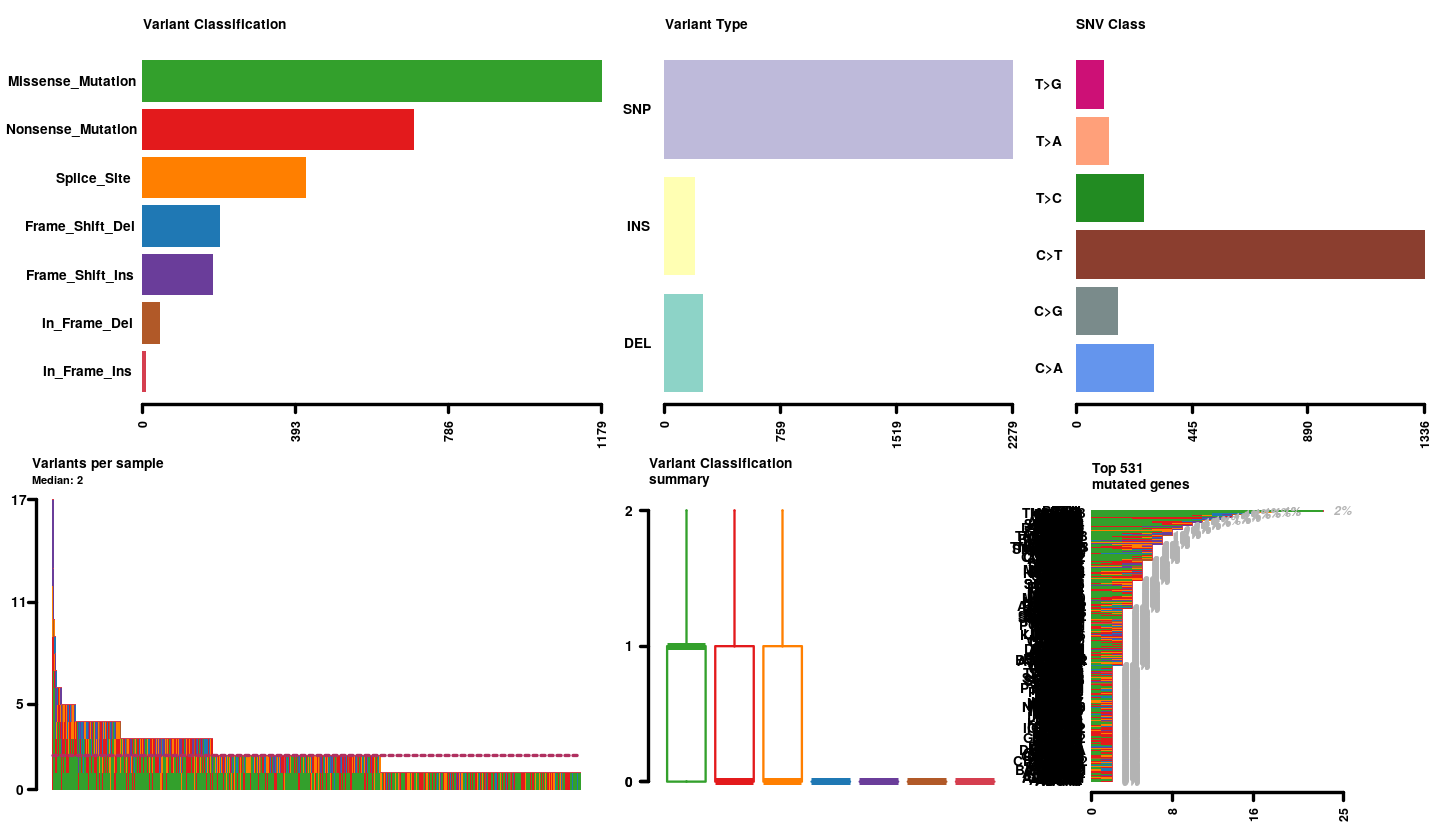

In [55]:
options(repr.plot.width=12, repr.plot.height=7)
plotmafSummary(maf = dfx, rmOutlier = FALSE ,dashboard = TRUE,addStat = 'median', textSize = 2, top = gf_sx, showBarcodes=F )

In [56]:
gs = as.data.frame( dfx@gene.summary )  
gf_sx2 = nrow( gs[ gs$MutatedSamples >= 7,] )
gf_sx2

[1] 65

### plotmafSummary of top 65 genes

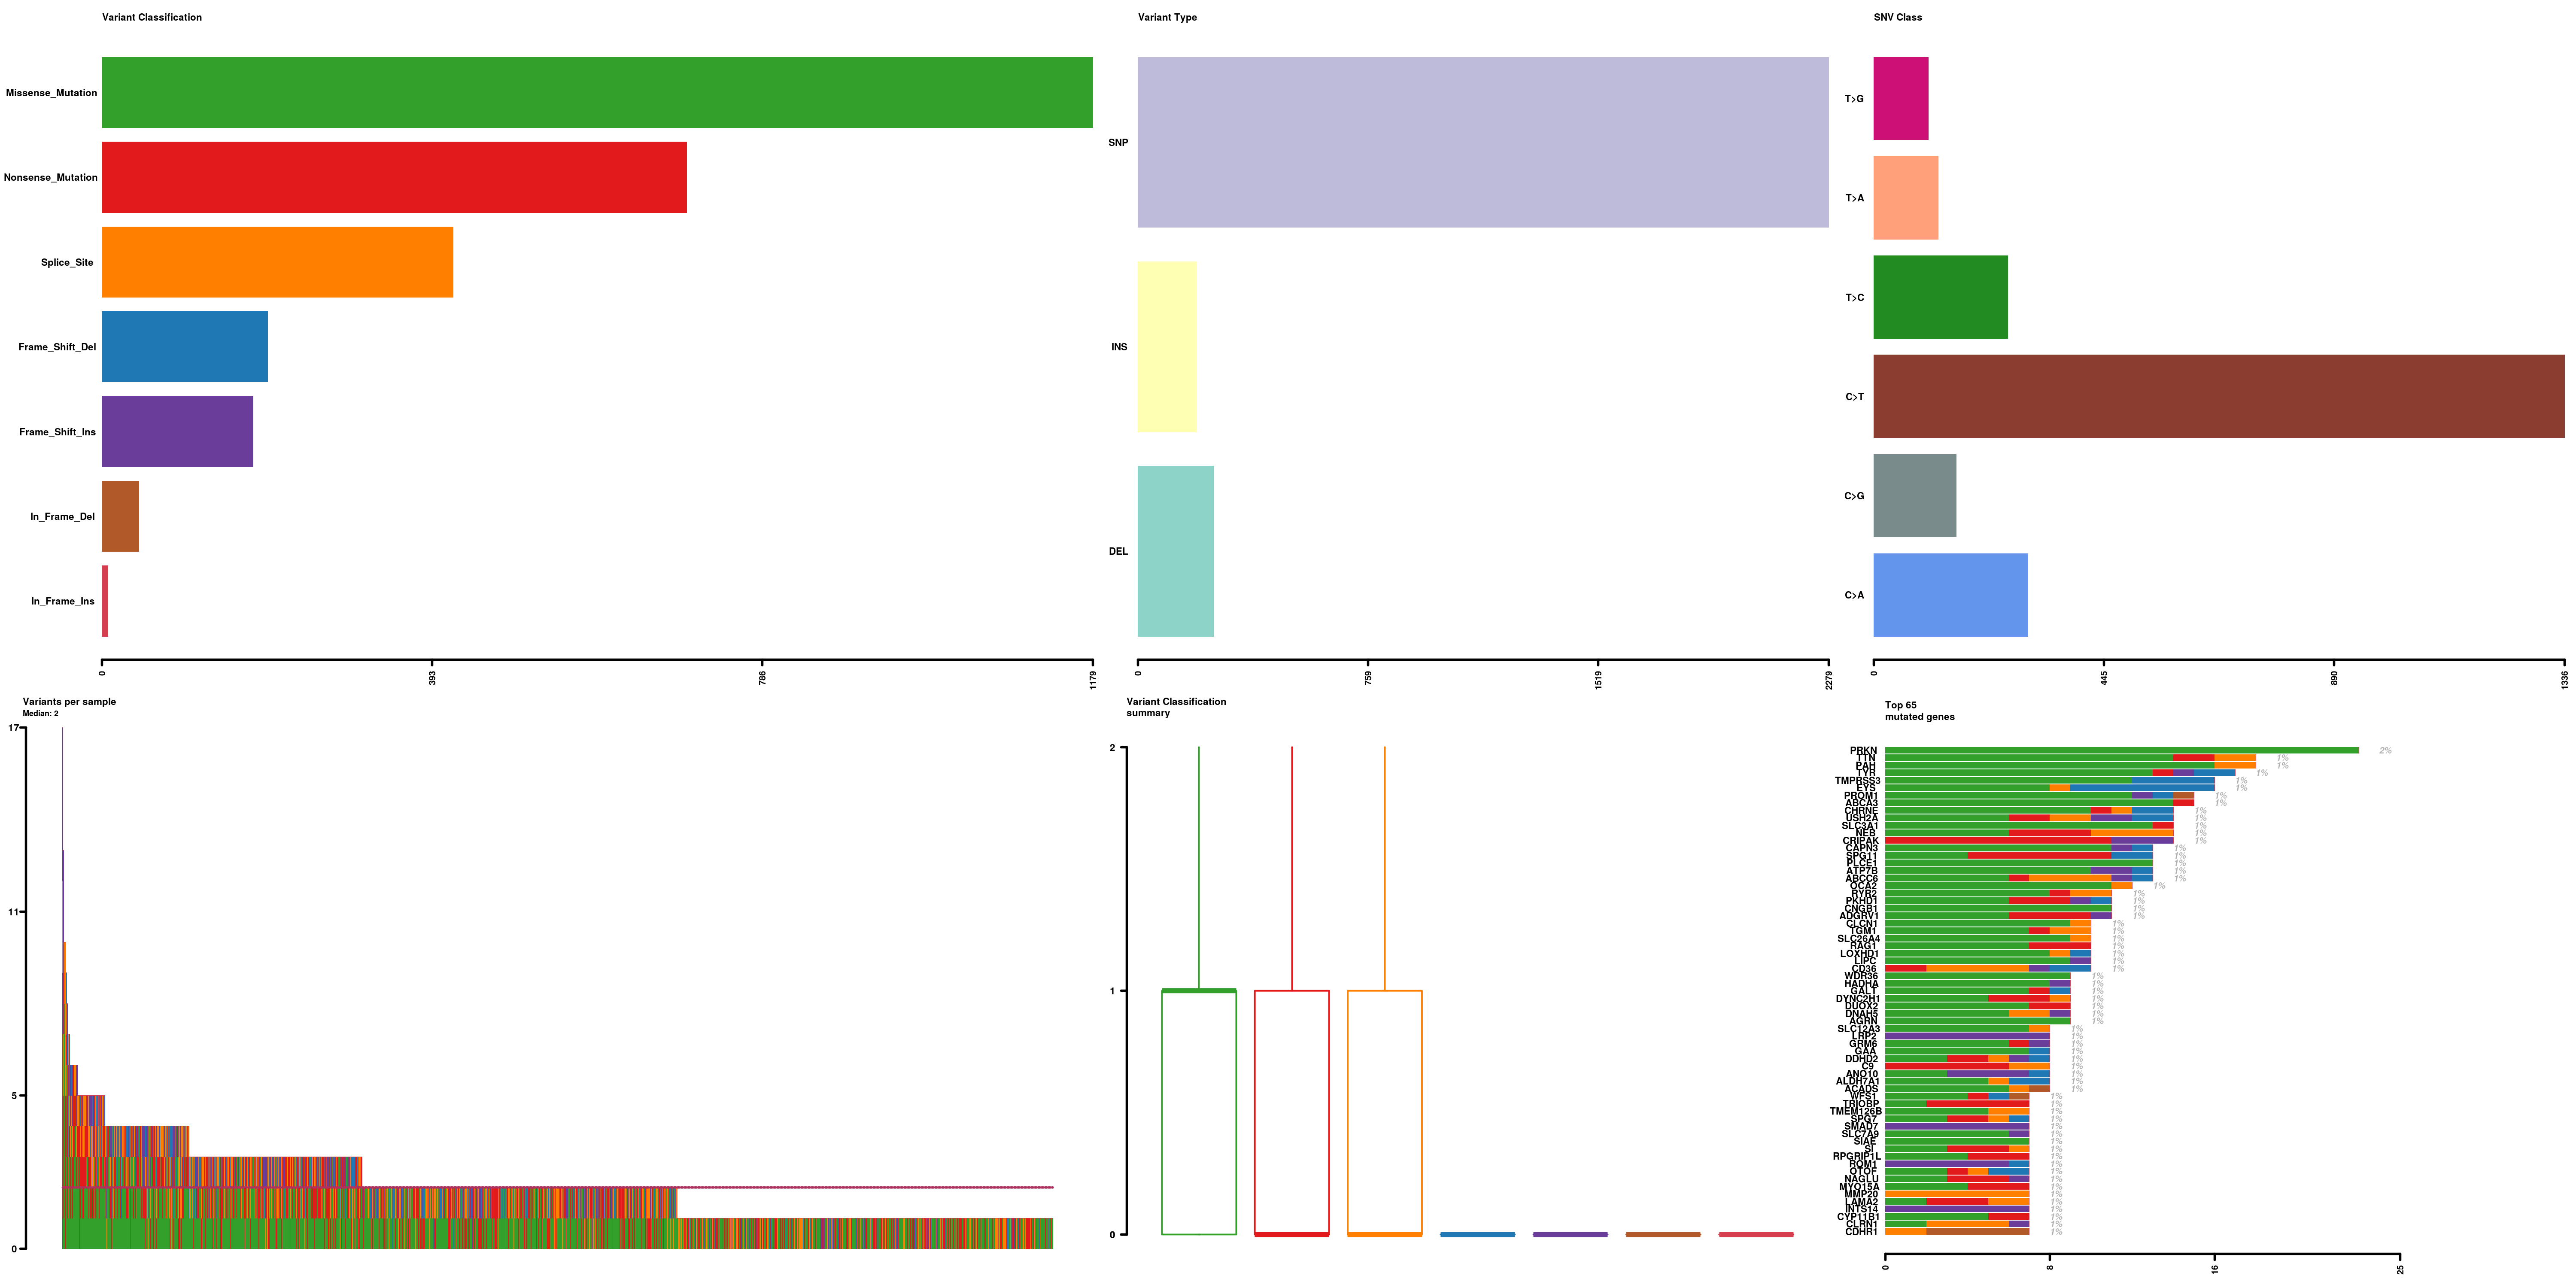

In [57]:
options(repr.plot.width=30, repr.plot.height=15, repr.plot.res=200)
plotmafSummary(maf = dfx, rmOutlier = FALSE ,dashboard = TRUE,addStat = 'median', textSize = 20, top = gf_sx2, showBarcodes=F )

In [50]:
# out_svg = paste0('../Suggesting_Variants/plots/Suggesting','_plotmafsummary_01.svg')
# paste0("Saving : ", out_svg)
# svg(out_svg, height=15, width=20)
# plotmafSummary(maf = dfx, rmOutlier = FALSE ,dashboard = TRUE,addStat = 'median', textSize = 20, top = gf_sx2, showBarcodes=F )
# dev.off()

### Oncoplots or waterfall plots
- Adding Clinical Data on oncoplot

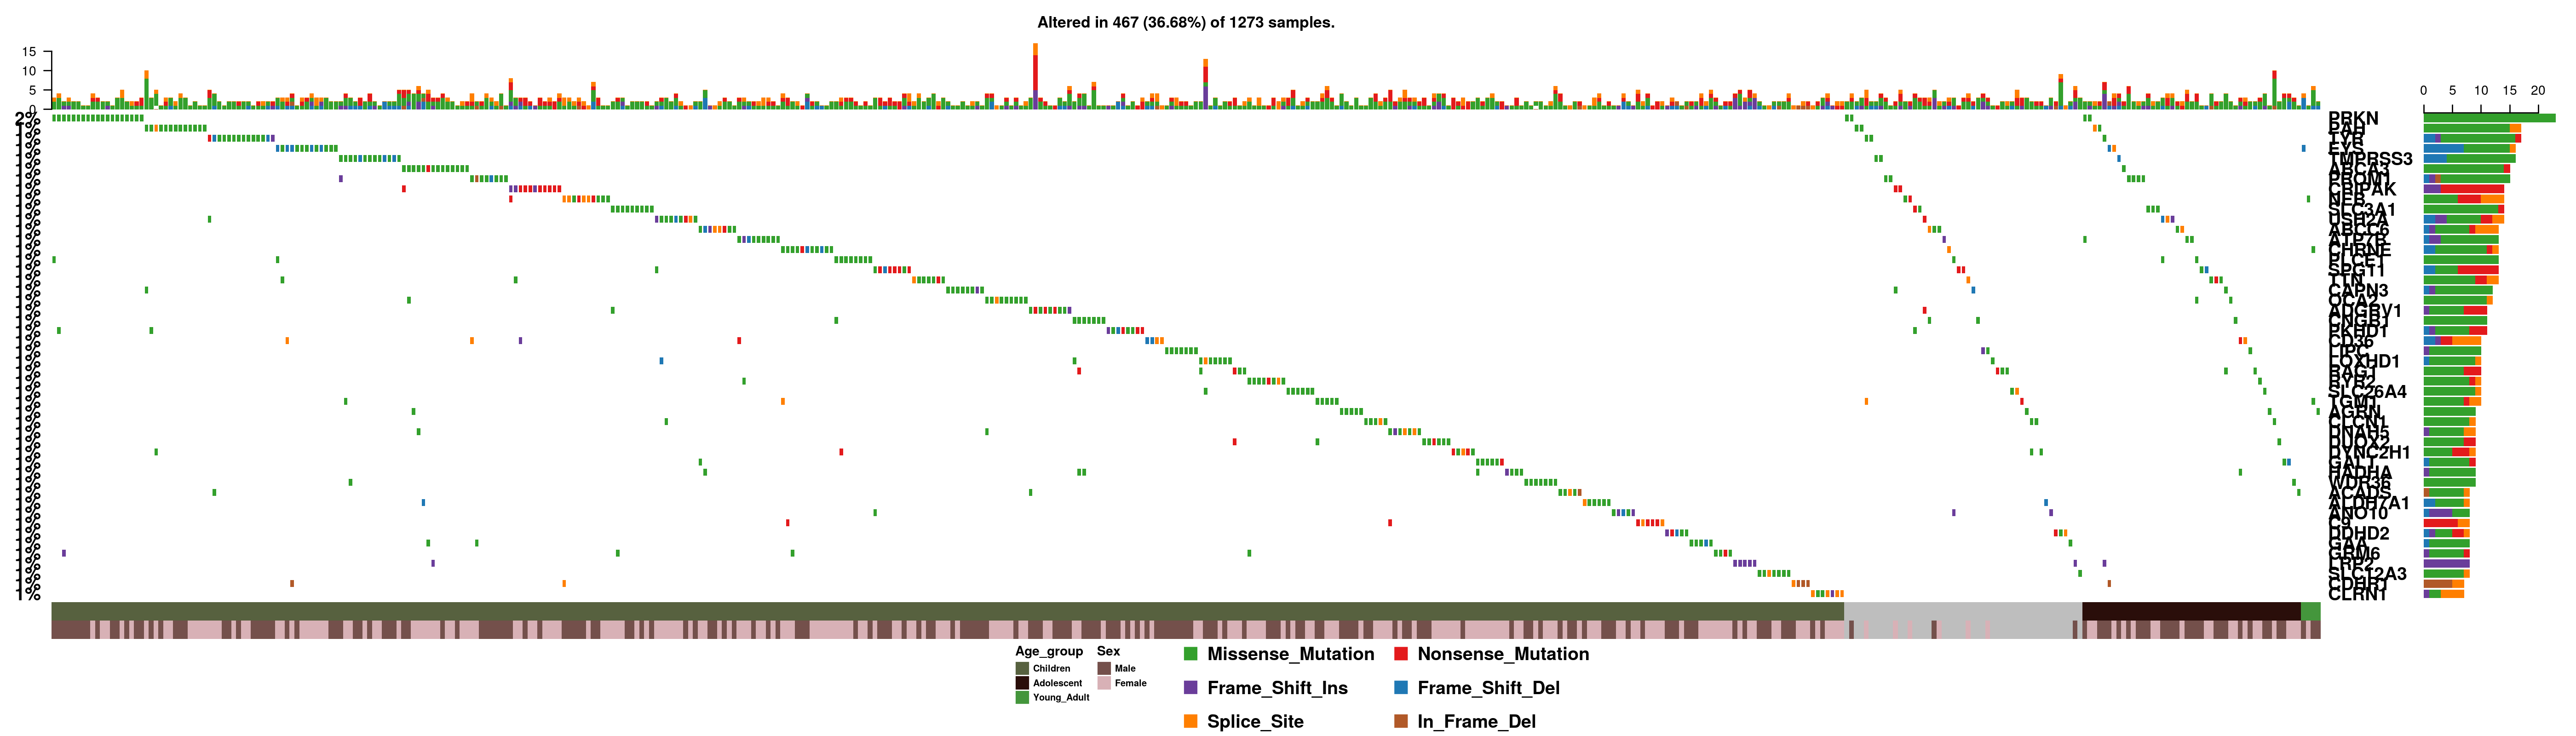

In [58]:
options(repr.plot.width=28, repr.plot.height=8)
oncoplot(maf = dfx,bgCol = "white",
        top = 48,
        
        fontSize = 14,
        SampleNamefontSize = 8,
        titleFontSize = 12,
        legendFontSize = 14,
        annotationTitleFontSize = 10,
        annotationFontSize = 7,
        
        drawColBar = TRUE,
        drawRowBar = TRUE,
        showTumorSampleBarcodes = F,
        sortByAnnotation = TRUE,
        writeMatrix = TRUE,
        clinicalFeatures = c("Age_group","Sex"))

### Make Oncoplot when a gene is mutated in more than 7 samples

[1] "Saving : ../Suggesting_Variants/plots/Suggesting_oncoplot_31stMay_01.svg"

png 
  2

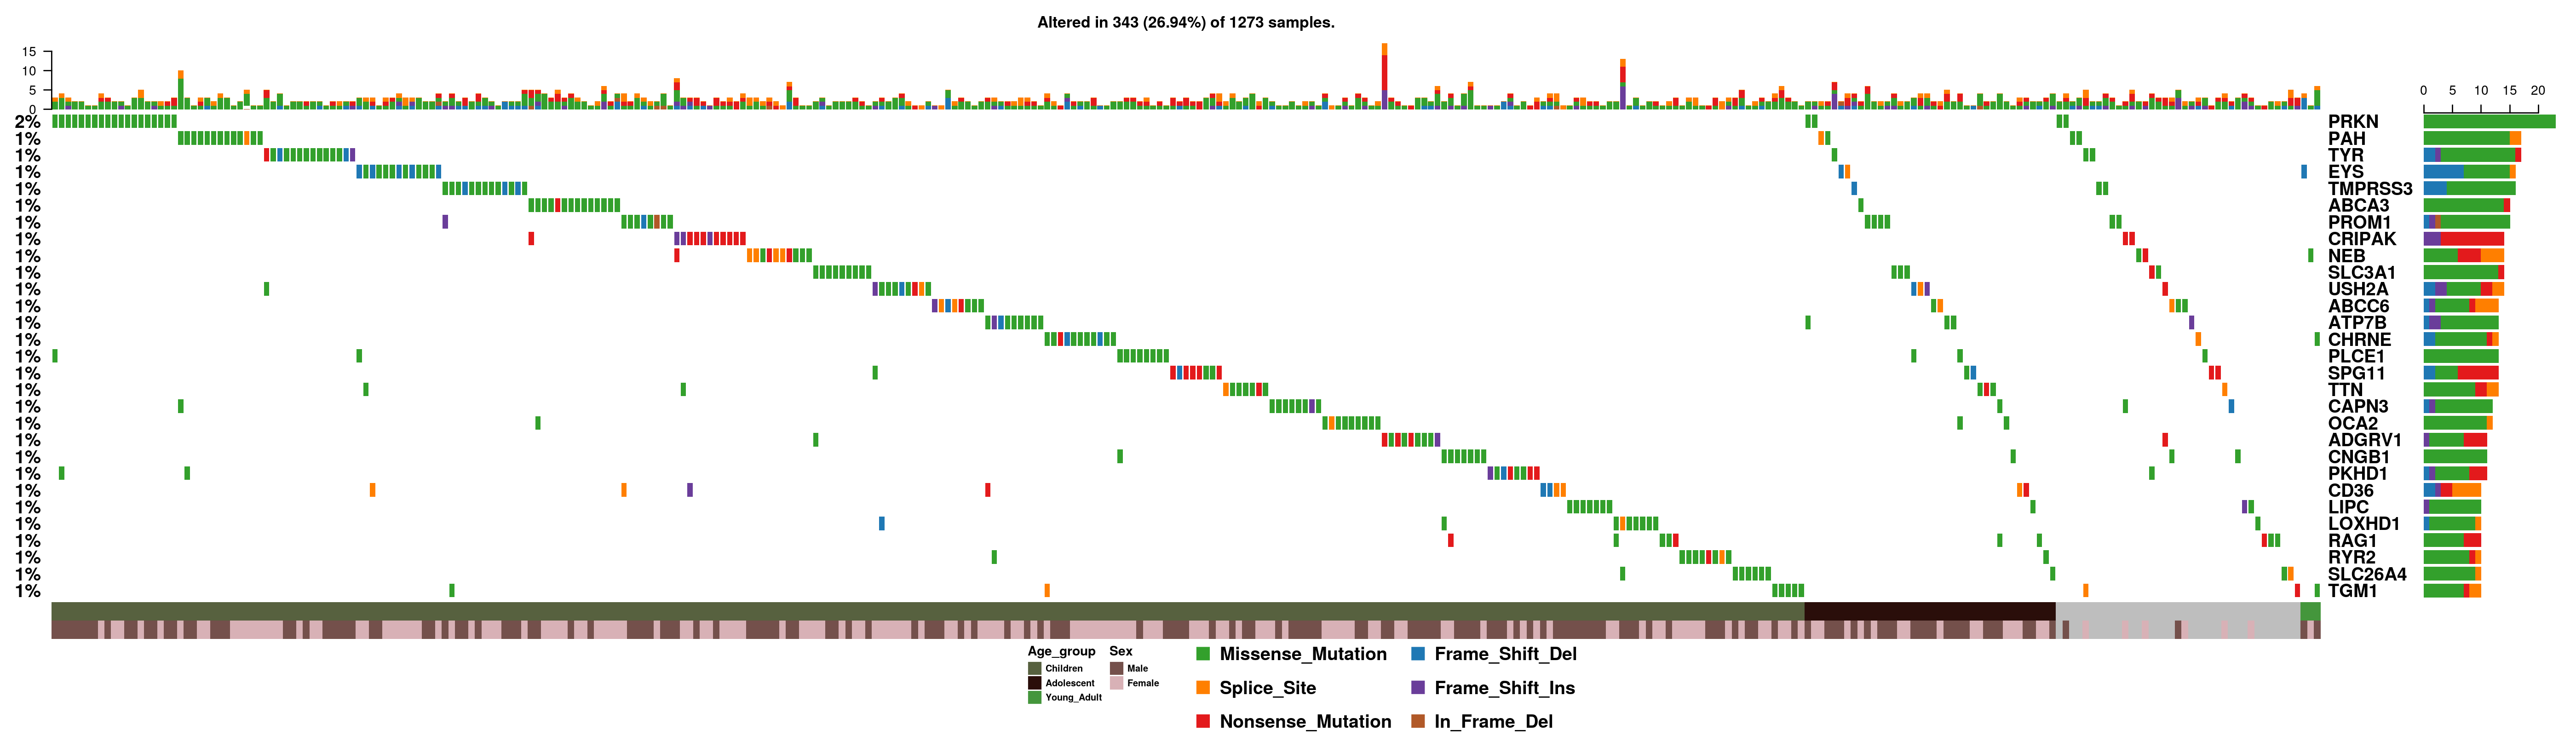

In [64]:
options(repr.plot.width=28, repr.plot.height=8)
oncoplot(maf = dfx,bgCol = "white",
        top = 29,
        
        fontSize = 14,
        SampleNamefontSize = 8,
        titleFontSize = 12,
        legendFontSize = 14,
        annotationTitleFontSize = 10,
        annotationFontSize = 7,
        
        drawColBar = TRUE,
        drawRowBar = TRUE,
        showTumorSampleBarcodes = F,
        sortByAnnotation = TRUE,
        writeMatrix = TRUE,
        clinicalFeatures = c("Age_group","Sex"))

out_svg = paste0('../Suggesting_Variants/plots/Suggesting','_oncoplot_31stMay_01.svg')
paste0("Saving : ", out_svg)
svg(out_svg, width=18, height=8)
oncoplot(maf = dfx,bgCol = "white",
         top = gf_sx2,
        
        fontSize = 14,
        SampleNamefontSize = 32,
        titleFontSize = 12,
        legendFontSize = 14,
        annotationTitleFontSize = 10,
        annotationFontSize = 9,
        
         drawColBar = TRUE,
         drawRowBar = TRUE,
         showTumorSampleBarcodes = F,
         sortByAnnotation = TRUE,
         writeMatrix = FALSE,
         clinicalFeatures = c("Age_group","Sex"))
dev.off()

[1] "Saving : ../Suggesting_Variants/plots/Suggesting_oncoplot_31stMay_01.pdf"

png 
  2

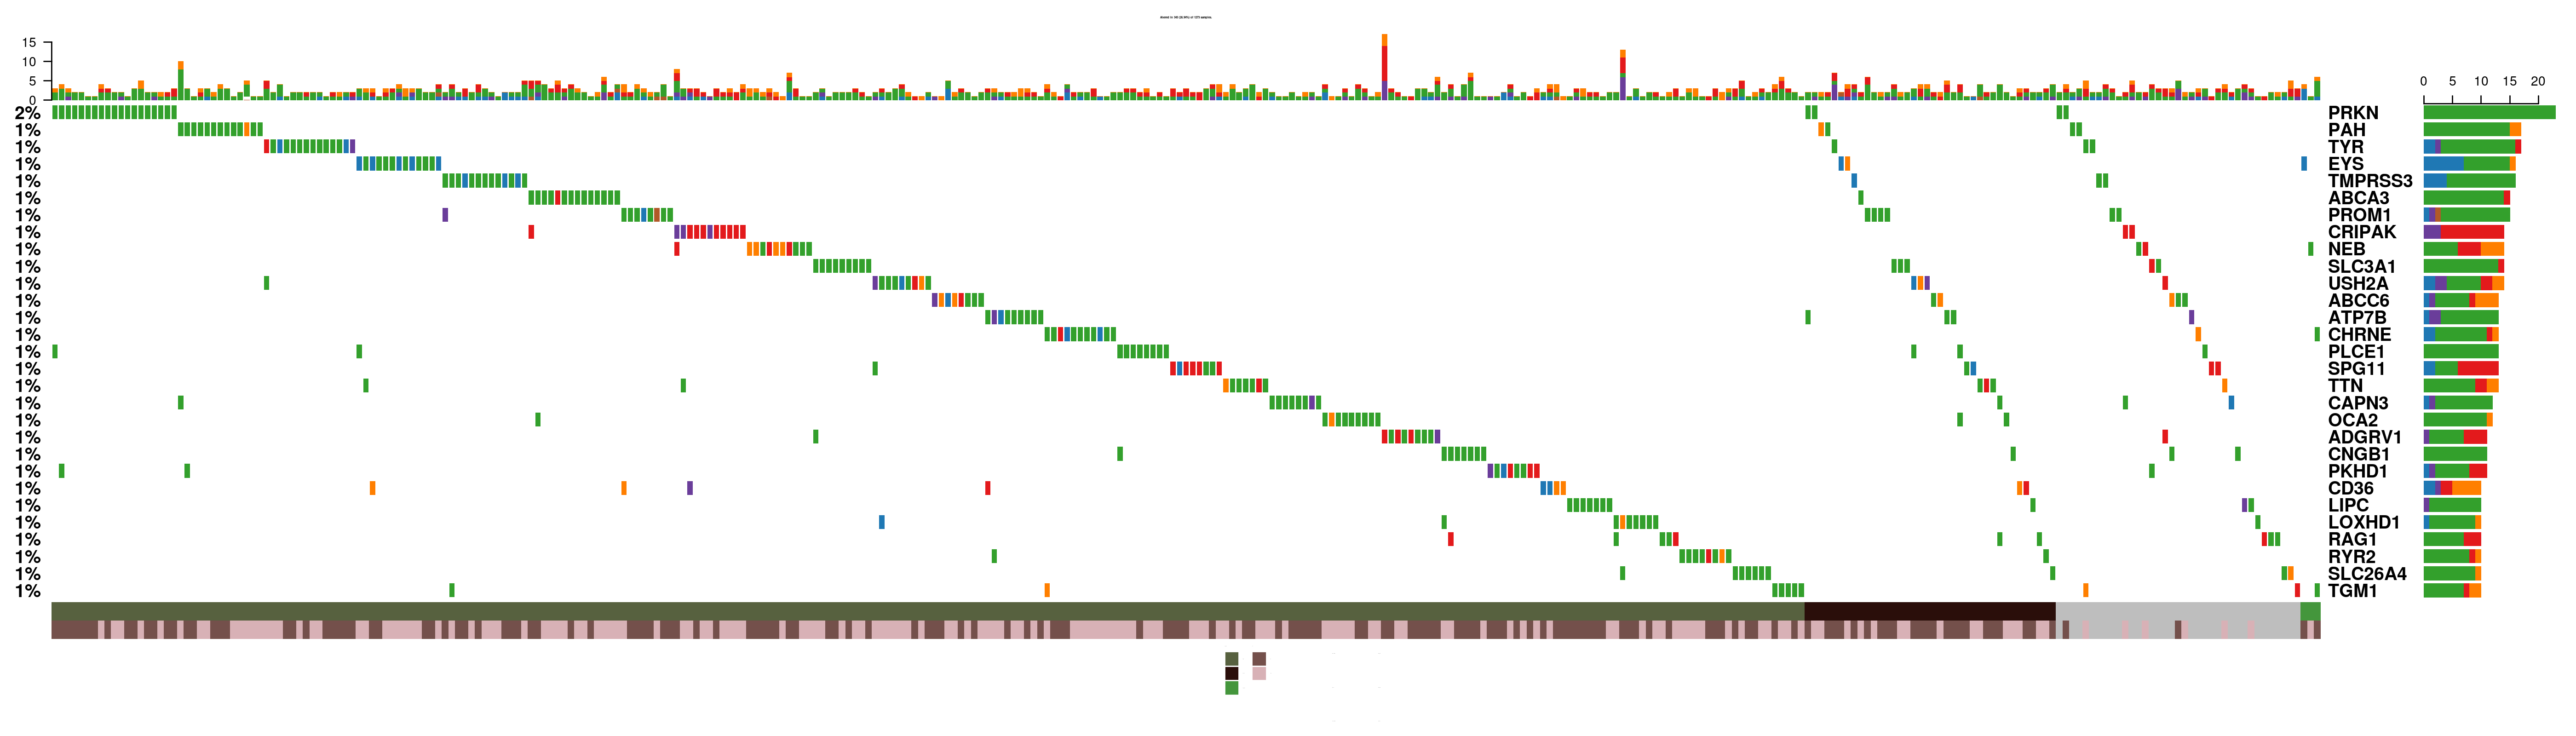

In [65]:
options(repr.plot.width=28, repr.plot.height=8)
oncoplot(maf = dfx,bgCol = "white",
        top = 29,
        
        fontSize = 14,
        SampleNamefontSize = 0,
        titleFontSize = 2,
        legendFontSize = 0,
        annotationTitleFontSize = 0,
        annotationFontSize = 0,
        
        drawColBar = TRUE,
        drawRowBar = TRUE,
        showTumorSampleBarcodes = F,
        sortByAnnotation = TRUE,
        writeMatrix = FALSE,
        clinicalFeatures = c("Age_group","Sex"))

out_img = paste0('../Suggesting_Variants/plots/Suggesting','_oncoplot_31stMay_01.pdf')
paste0("Saving : ", out_img)
pdf(out_img, width=18, height=8)
oncoplot(maf = dfx,bgCol = "white",
         top = gf_sx2,
        
        fontSize = 14,
        SampleNamefontSize = 0,
        titleFontSize = 2,
        legendFontSize = 0,
        annotationTitleFontSize = 0,
        annotationFontSize = 0,
        
         drawColBar = TRUE,
         drawRowBar = TRUE,
         showTumorSampleBarcodes = F,
         sortByAnnotation = TRUE,
         writeMatrix = FALSE,
         clinicalFeatures = c("Age_group","Sex"))
dev.off()